# Carbon Dioxide Emissions From Fossil Fuels

Data derived from the Carbon Dioxide Information Analysis Center data set found here: https://cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2014.ems

## Boilerplate

In [1]:
## !pip install altair notebook vega --upgrade
     
import pandas as pd
import numpy as np
import altair as alt


RendererRegistry.enable('notebook')

## Loading and sanity check of data

In [2]:
df = pd.read_csv('data/carbon-emissions.csv')

In [3]:
df.head()

,Year,Total,Gas,Liquids,Solids,Gas Flaring,Total w/o cement and flaring,Cement Production,Per Capita,Total Co2,Total C Normalized,Total CO2 Normalized
0,1751,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000
1,1752,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000
2,1753,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000
3,1754,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000
4,1755,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000


In [4]:
df.dtypes

Year                              int64
Total                             int64
Gas                               int64
Liquids                           int64
Solids                            int64
Gas Flaring                       int64
Total w/o cement and flaring      int64
Cement Production                 int64
Per Capita                      float64
Total Co2                       float64
Total C Normalized                int64
Total CO2 Normalized              int64
dtype: object

In [5]:
df['old_year'] = df.Year
df.Year = pd.to_datetime(df.Year, format='%Y')
df.head()

,Year,Total,Gas,Liquids,Solids,Gas Flaring,Total w/o cement and flaring,Cement Production,Per Capita,Total Co2,Total C Normalized,Total CO2 Normalized,old_year
0,1751-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1751
1,1752-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1752
2,1753-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1753
3,1754-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1754
4,1755-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1755


## Making charts

In Altair you need to specify the **mark** (line, point, area, bar, ect) and the visual **encodings** or variables (x-position, y-position, color, etc).

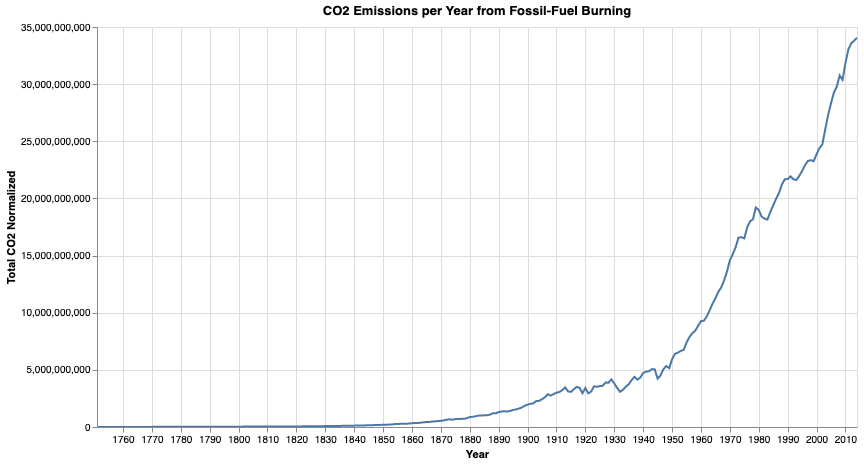

In [6]:
alt.Chart(df).mark_line().encode(
    x='Year:T',
    y='Total CO2 Normalized:Q'
).properties(
    title='CO2 Emissions per Year from Fossil-Fuel Burning',
    width=760,
    height=400
)
# .interactive()

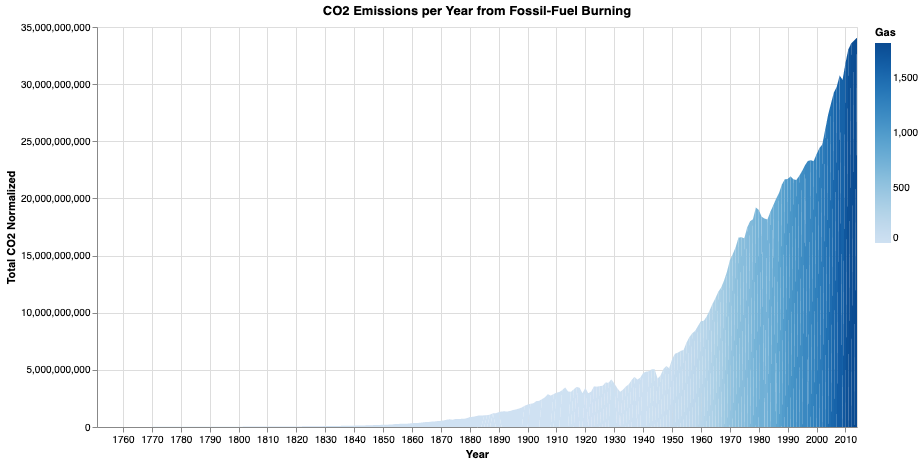

In [7]:
alt.Chart(df).mark_area().encode(
    x='Year:T',
    y='Total CO2 Normalized:Q',
    color='Gas:Q'
).properties(
    title='CO2 Emissions per Year from Fossil-Fuel Burning',
    width=760,
    height=400
)
# .interactive()

## Data transformation

You'll almost always have to clean and transform your data. You can also derive new fields that are more appropriate for your task.

In [8]:
df_melted = pd.melt(df, id_vars=['Year'], value_vars=['Gas', 'Liquids', 'Solids', 'Gas Flaring', 'Cement Production'])
df_melted

,Year,variable,value
0,1751-01-01,Gas,0
1,1752-01-01,Gas,0
2,1753-01-01,Gas,0
3,1754-01-01,Gas,0
4,1755-01-01,Gas,0
5,1756-01-01,Gas,0
6,1757-01-01,Gas,0
7,1758-01-01,Gas,0
8,1759-01-01,Gas,0
9,1760-01-01,Gas,0


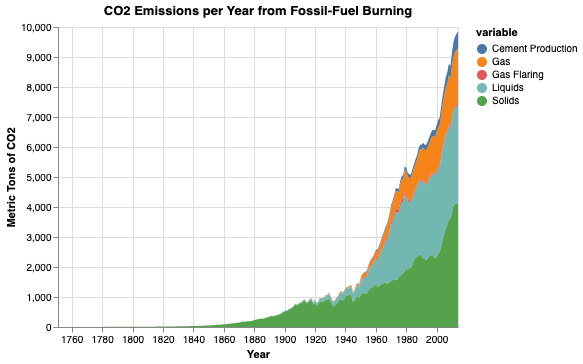

In [9]:
alt.Chart(df_melted).mark_area().encode(
    x='Year:T',
    y=alt.Y('value:Q', title="Metric Tons of CO2"),
    color='variable:N'
).properties(
    title='CO2 Emissions per Year from Fossil-Fuel Burning'
)

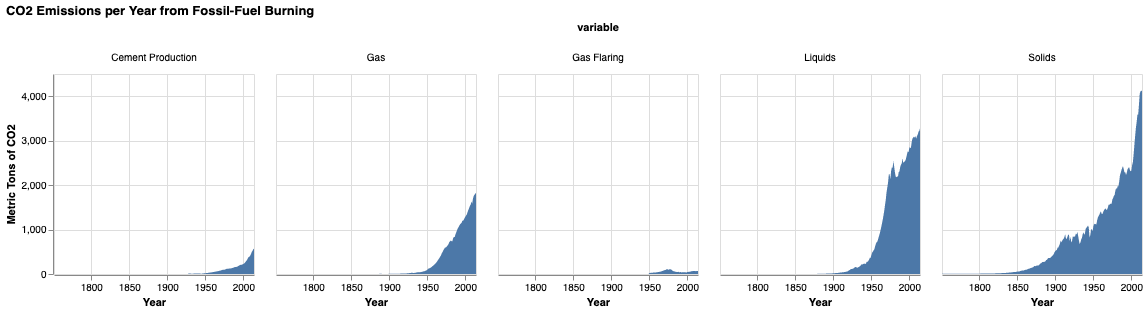

In [10]:
alt.Chart(df_melted).mark_area().encode(
    x='Year:T',
    y=alt.Y('value:Q', title="Metric Tons of CO2"),
    column='variable:N'
).properties(
    title='CO2 Emissions per Year from Fossil-Fuel Burning',
    width=200,
    height=200
)

In [11]:
df['CO2 derivative'] = df['Total CO2 Normalized'].diff()
df['CO2 derivative smoothed'] = df['CO2 derivative'].rolling(10).mean()

df['CO2 acceleration'] = df['CO2 derivative'].diff()
df['CO2 acceleration smoothed'] = df['CO2 acceleration'].rolling(10).mean()


In [12]:
df.head()

,Year,Total,Gas,Liquids,Solids,Gas Flaring,Total w/o cement and flaring,Cement Production,Per Capita,Total Co2,Total C Normalized,Total CO2 Normalized,old_year,CO2 derivative,CO2 derivative smoothed,CO2 acceleration,CO2 acceleration smoothed
0,1751-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1751,NaN,NaN,NaN,NaN
1,1752-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1752,0.0,NaN,NaN,NaN
2,1753-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1753,0.0,NaN,0.0,NaN
3,1754-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1754,0.0,NaN,0.0,NaN
4,1755-01-01,3,0,0,3,0,3,0,NaN,11.001,3000000,11001000,1755,0.0,NaN,0.0,NaN


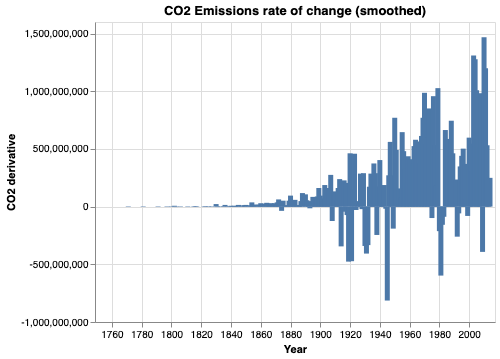

In [13]:
alt.Chart(df).mark_bar().encode(
    x='Year:T',
    y='CO2 derivative:Q'
).properties(
    title='CO2 Emissions rate of change (smoothed)',
)

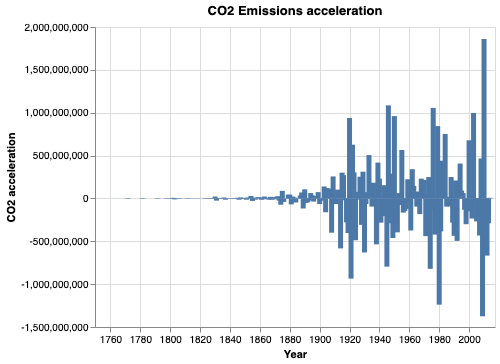

In [14]:
alt.Chart(df).mark_bar().encode(
    x='Year:T',
    y='CO2 acceleration:Q'
).properties(
    title='CO2 Emissions acceleration',
)

## Learn more

- Altair (Python bindings to vega-lite) https://altair-viz.github.io/
- Vega Lite (Visualization Grammar) https://vega.github.io/vega-lite/